## Canal Simétrico Binario (BSC) y Decisión de Máxima Verosimilitud (ML)

El modelo de generación de ruido más común en las comunicaciones digitales que resulta en una observación de valores discretos es el **canal simétrico binario** (Binary Symmetric Channel o BSC). Este canal se aplica cuando el símbolo de datos de entrada es binario y las probabilidades condicionales están dadas por:

$$
P_{Y|A}(0|0) = 1 - p, \quad P_{Y|A}(1|0) = p
$$
$$
P_{Y|A}(0|1) = p, \quad P_{Y|A}(1|1) = 1 - p
$$

Donde:
- \( A \in \{ 0,1 \} \) es el símbolo transmitido.
- \( Y \in \{ 0,1 \} \) es la observación ruidosa.
- \( p \) es la probabilidad de error (probabilidad de cruce del BSC).

### Regla de Decisión ML

La regla de decisión de Máxima Verosimilitud (ML) elige el valor de \( A \) que maximiza \( P_{Y|A}(Y|A)P_A(A) \). Es decir:

$$
A_{ML} = \arg\max_{a} P_{Y|A}(y|a) P_A(a)
$$

Para dos casos particulares:

#### Caso 1: \( q = 0.6 \), \( p = 0.3 \)

Las probabilidades a posteriori son:
$$
P_{A|Y}(0|0) \propto P_{Y|A}(0|0) P_A(0) = (1 - 0.3)(0.6) = 0.42
$$
$$
P_{A|Y}(1|0) \propto P_{Y|A}(0|1) P_A(1) = (0.3)(0.4) = 0.12
$$
Dado que \( 0.42 > 0.12 \), se elige \( A = 0 \) cuando \( Y = 0 \).

De manera similar, cuando \( Y = 1 \):
$$
P_{A|Y}(0|1) = (0.3)(0.6) = 0.18, \quad P_{A|Y}(1|1) = (0.7)(0.4) = 0.28
$$
Dado que \( 0.28 > 0.18 \), se elige \( A = 1 \) cuando \( Y = 1 \).

**Regla de Decisión:**
- Si \( Y = 0 \), decidir \( A = 0 \)
- Si \( Y = 1 \), decidir \( A = 1 \)

#### Caso 2: \( q = 0.5 \), \( p = 0.3 \)

Si \( q = 0.5 \), las probabilidades son:
$$
P_{A|Y}(0|0) \propto (1 - 0.3)(0.5) = 0.35, \quad P_{A|Y}(1|0) \propto (0.3)(0.5) = 0.15
$$
$$
P_{A|Y}(0|1) \propto (0.3)(0.5) = 0.15, \quad P_{A|Y}(1|1) \propto (0.7)(0.5) = 0.35
$$

Aquí también la regla de decisión es:
- Si \( Y = 0 \), decidir \( A = 0 \)
- Si \( Y = 1 \), decidir \( A = 1 \)

### Probabilidad de Error

La **probabilidad de error** en un canal BSC se define como la probabilidad de que la decisión basada en \( Y \) no coincida con el valor real de \( A \):

$$
P_e = P(A=0) P(Y=1 | A=0) + P(A=1) P(Y=0 | A=1)
$$

Usando las probabilidades del BSC:

$$
P_e = q p + (1 - q) p
$$

$$
P_e = p (q + (1 - q)) = p
$$

Por lo tanto, la **probabilidad de error en el BSC es simplemente \( p \)**, independientemente del valor de \( q \).


## Simulación Monte Carlo

Para visualizar el comportamiento del BSC, realizamos una simulación con  y , un caso donde el canal casi siempre invierte el bit original.

Probabilidad de error: 0.900


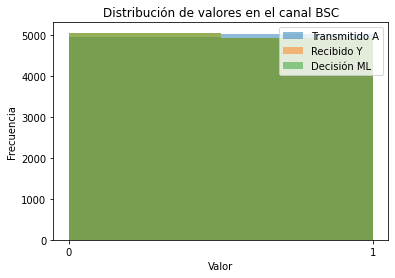

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
q = 0.5  # Probabilidad a priori de A = 0
p = 0.9  # Probabilidad de error
N = 10000  # Número de simulaciones

# Generación de símbolos A
A = np.random.choice([0, 1], size=N, p=[q, 1 - q])

# Generación de observaciones Y con error
flip = np.random.choice([0, 1], size=N, p=[1 - p, p])
Y = np.bitwise_xor(A, flip)

# Decisión ML
A_hat = Y  # Regla ML estándar para p bajo

# Cálculo del error
error_rate = np.mean(A_hat != A)
print(f"Probabilidad de error: {error_rate:.3f}")

# Visualización
plt.figure(figsize=(6, 4))
plt.hist(A, bins=2, alpha=0.5, label='Transmitido A')
plt.hist(Y, bins=2, alpha=0.5, label='Recibido Y')
plt.hist(A_hat, bins=2, alpha=0.5, label='Decisión ML')
plt.xticks([0, 1])
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Distribución de valores en el canal BSC")
plt.show()